In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import warnings

In [3]:
warnings.filterwarnings("ignore")


In [4]:
iris=load_iris()

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
#should i perform feature scaling while implementing decision tree:
  #we are not perfroming feature scaling for the decision tree algorithm as it chooses the one feature for spliting the node . it won't impact to other feature .

In [8]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
X_train,x_test,y_train,y_test=train_test_split(iris.data, iris.target,random_state=13)

In [10]:
X_train[0]

array([6.2, 2.2, 4.5, 1.5])

In [11]:
model=DecisionTreeClassifier()

In [12]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
ypred=model.predict(x_test)

In [14]:
model.score(x_test,y_test)

0.9736842105263158

In [15]:
accuracy_score(y_test,ypred)

0.9736842105263158

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid={
    'max_depth':[3,4,5,6],
    'min_samples_split':[1,2,4],
    'min_samples_leaf':[3,4,5]
}

In [18]:
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=6)

In [19]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [1, 2, 4]})

In [20]:
grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [21]:
model2=DecisionTreeClassifier(max_depth= 3, min_samples_leaf= 3, min_samples_split= 2)

In [22]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)

In [23]:
y_predict=model2.predict(x_test)

In [24]:
accuracy_score(y_predict,y_test)

1.0

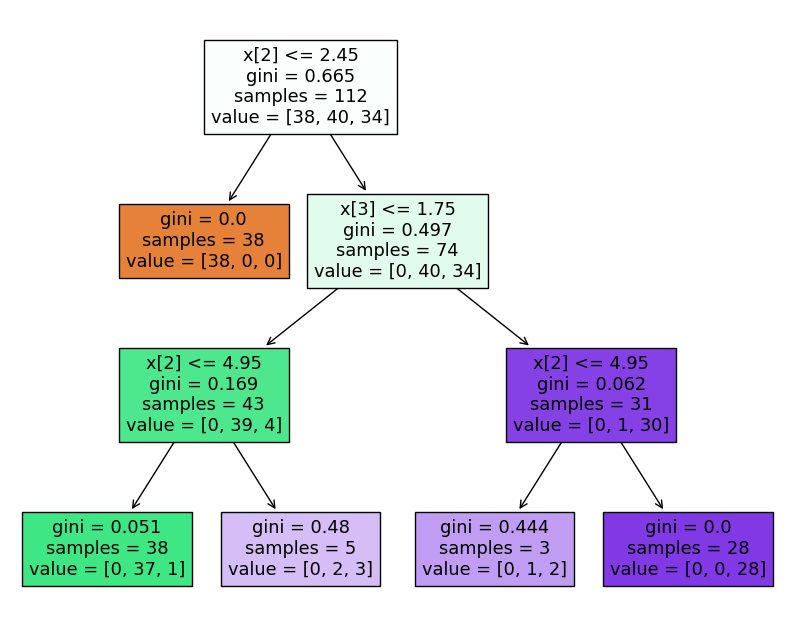

In [31]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
tree.plot_tree(model2,filled=True)
plt.show()


# implementation of regressor 


In [32]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [33]:
load_d=load_diabetes()

In [34]:
load_d

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [35]:
load_d.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [37]:
load_d.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(load_d.data,load_d.target)

In [43]:
model=DecisionTreeRegressor()

In [44]:
model.fit(X_train,Y_train)

DecisionTreeRegressor()

In [45]:
model.score(X_test,Y_test)

-0.004794063519823588

# Question on decision tree algorithm 

    1)what is decision tree algorithm and how does it works?
             -> it is supervisied machine learning algorithm  wherein  we create a tree  like structure using two approches cart and id3.
    2)what are the different type of algorithm we have for the decision tree?
              1)CART
              2)ID3
              3)C4.5
              4)CHAID(CHI- SQUARE )
    3)does missing value impact the decision tree?
              IT DO MATTER WHEN THE MISSING VALUES ARE TOO MUCH.

     4)what is overfitting and how to avoid it?
                 it means the model is giving good accuracy on training but fails in the testing data 
                 there are many method :
                 1.pruning 
                 2.preprocessing
                 3.ensemble method 

    5)what is pruning in decision tree? explain prepruning 
              -> in pruning we reduce the time complexity and prevent from the overfitting 
    6)can you explain the concept of impurity in DT ?
              -> gini impurity is used to choose the root node feature of the tree . we take the lowest value of gini for the root feature.
    7)what is the advantage and disadvantage of of DT?
            pros:
             1.easy to interepret and understand
             2.can handle both categorical and numerical features 
             3.able to handle outliers
             4.no need to do scaling 
            cons:
             1.prone to overfitting 
             2.complex data pattern can not perform well
             3.less sensitive to missing values 
             4.can not perform on large datasets


    8)how to do feature selection using decision tree?
                we select first features which create a more impact on the depend features
    9)if the data is imbalance should i do decision tree and it it robust ?
              8yes-> 2 no (this is called imbalance data it first handle using mean , median , mode
    10)can you tell me the Scenario where should i not used DT?
              wherever there is complex pattern and large data i should not go to used decision tree instead used ensemble method(random forest, XGboost)
              '''
